# Clase 6, Datos Atipicos y Formas Funcionales

## Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
# ==============================================================================
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


## Datos

In [2]:
df = pd.read_csv('datasets/clase6.csv')
list(df)

['Educacion', 'Experiencia', 'Permanencia', 'Genero', 'EstadoCivil', 'Salario']

In [3]:
reg = smf.ols('Salario ~ Educacion + Experiencia + Permanencia +Genero + EstadoCivil' , data=df) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.004
Date:                Fri, 12 Aug 2022   Prob (F-statistic):              0.415
Time:                        17:39:41   Log-Likelihood:                -2727.8
No. Observations:                 526   AIC:                             5468.
Df Residuals:                     520   BIC:                             5493.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.7624     10.664     -0.259      

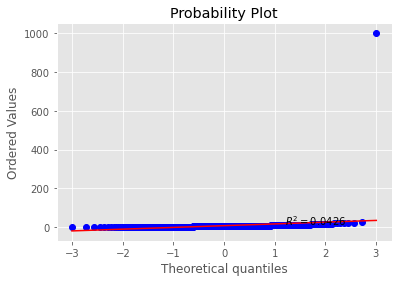

In [4]:
stats.probplot(df['Salario'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [5]:
# Vamos a limpiar el valor Atipico
# Primero ordenaremos los valores de menor a mayor

df = df.sort_values('Salario')
df

,Educacion,Experiencia,Permanencia,Genero,EstadoCivil,Salario
23,12,3,1,1,0,0.53
515,12,17,0,1,1,1.43
127,8,31,30,0,0,1.50
452,12,11,1,1,1,1.50
50,12,18,0,1,0,1.63
...,...,...,...,...,...,...
185,12,24,16,0,1,21.86
14,12,31,15,0,1,22.20
228,16,16,7,0,1,22.86
111,18,29,25,0,1,24.98


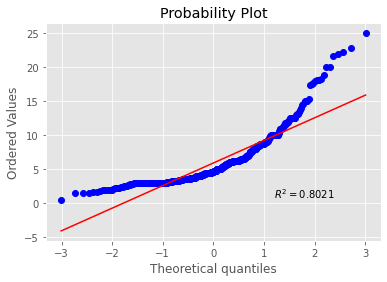

In [6]:
df = df[df['Salario']<1000]
stats.probplot(df['Salario'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [7]:
reg = smf.ols('Salario ~ Educacion + Experiencia + Permanencia +Genero + EstadoCivil' , data=df) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     60.52
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.22e-49
Time:                        17:39:41   Log-Likelihood:                -1310.0
No. Observations:                 525   AIC:                             2632.
Df Residuals:                     519   BIC:                             2657.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.6210      0.723     -2.241      

## Interpretacion de betas

### Caso 1

In [8]:
reg = smf.ols('Salario ~  Genero ', data=df) 
res = reg.fit()
print(res.summary())
#Fisher menor que 0, rechazo hipotesis nula, la variable mujer tiene una relacion con el salario.
# Dejando las demas variables constantes, la mujeres ganan 2.5 unidades monetarias menos.
# El intercepto, cuando tengo una variable significa que en promedio los hombres ganan 7,09.

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     67.95
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.36e-15
Time:                        17:39:42   Log-Likelihood:                -1398.5
No. Observations:                 525   AIC:                             2801.
Df Residuals:                     523   BIC:                             2809.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0995      0.210     33.780      0.0

### Caso 2

In [9]:
import statsmodels.formula.api as smf
reg = smf.ols('Salario ~  Genero + EstadoCivil'  , data=df) 
res = reg.fit()
print(res.summary())

# Interpretacion de la variable casado:
 # Dejando las demas variables constantes, los casados ganan 1.34 unidades monetarias más que los solteros.
 # P  Value da 0, así que estadisticamente significativo
 # Los hombres no casados ganan 6,2 aprox unidades monetarias, estadisticamente significativo.

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     44.58
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.33e-18
Time:                        17:39:42   Log-Likelihood:                -1389.1
No. Observations:                 525   AIC:                             2784.
Df Residuals:                     522   BIC:                             2797.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.1744      0.297     20.814      

#### Distribucion de las variables

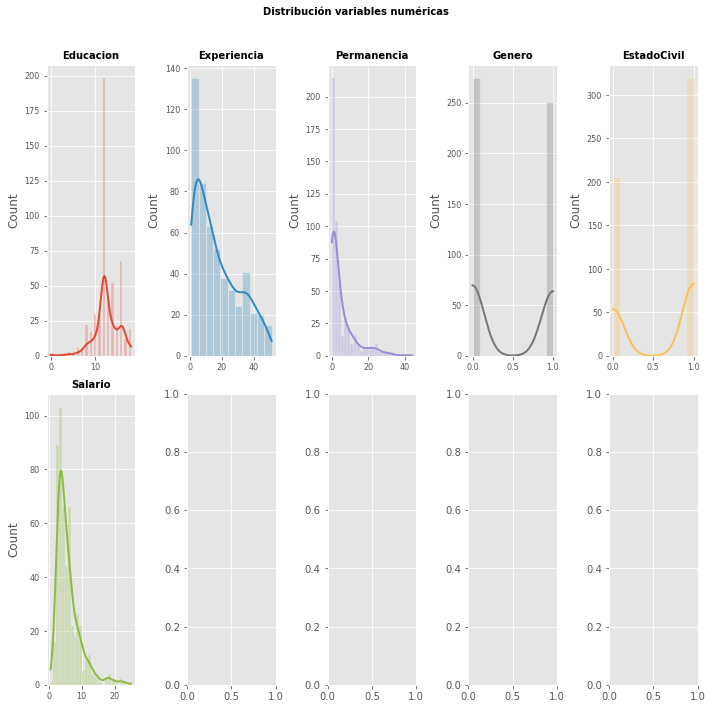

In [10]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [11]:
# Aveces hay que hacer un ajuste a la variable para que tenga significancia.

In [12]:
df['Experiencia2'] = np.where(df['Experiencia']>30, 2,np.where(df['Experiencia']<10 , 1 , 3))

In [13]:
df

,Educacion,Experiencia,Permanencia,Genero,EstadoCivil,Salario,Experiencia2
23,12,3,1,1,0,0.53,1
515,12,17,0,1,1,1.43,3
127,8,31,30,0,0,1.50,2
452,12,11,1,1,1,1.50,3
50,12,18,0,1,0,1.63,3
...,...,...,...,...,...,...,...
58,18,8,8,1,0,21.63,1
185,12,24,16,0,1,21.86,3
14,12,31,15,0,1,22.20,2
228,16,16,7,0,1,22.86,3


In [14]:
## Formas Funcionales

In [15]:
### Modelo 1

$ ln(Salario) = \beta_{0} + \beta_{1}\cdot Educ +\beta_{2}\cdot Exp + \beta_{3}\cdot Exp^2 +\beta_{3}\cdot Perm $

In [16]:
#Obtendremos Usando operadors de Numpy

# LN

df['lnwage'] = np.log(df['Salario'])

# Elevar

df['exp2'] = np.power(df['Experiencia'],2)

df

,Educacion,Experiencia,Permanencia,Genero,EstadoCivil,Salario,Experiencia2,lnwage,exp2
23,12,3,1,1,0,0.53,1,-0.634878,9
515,12,17,0,1,1,1.43,3,0.357674,289
127,8,31,30,0,0,1.50,2,0.405465,961
452,12,11,1,1,1,1.50,3,0.405465,121
50,12,18,0,1,0,1.63,3,0.488580,324
...,...,...,...,...,...,...,...,...,...
58,18,8,8,1,0,21.63,1,3.074081,64
185,12,24,16,0,1,21.86,3,3.084658,576
14,12,31,15,0,1,22.20,2,3.100092,961
228,16,16,7,0,1,22.86,3,3.129389,256


$ ln(Salario) = \beta_{0} + \beta_{1}\cdot Educ +\beta_{2}\cdot Exp + \beta_{3}\cdot Exp^2 +\beta_{3}\cdot Perm $

In [17]:
list(df)

['Educacion',
 'Experiencia',
 'Permanencia',
 'Genero',
 'EstadoCivil',
 'Salario',
 'Experiencia2',
 'lnwage',
 'exp2']

In [18]:
df1 = df[['lnwage','Educacion','Experiencia','exp2','Permanencia']]
df1

,lnwage,Educacion,Experiencia,exp2,Permanencia
23,-0.634878,12,3,9,1
515,0.357674,12,17,289,0
127,0.405465,8,31,961,30
452,0.405465,12,11,121,1
50,0.488580,12,18,324,0
...,...,...,...,...,...
58,3.074081,18,8,64,8
185,3.084658,12,24,576,16
14,3.100092,12,31,961,15
228,3.129389,16,16,256,7


In [19]:
reg = smf.ols('lnwage ~  Educacion + Experiencia + exp2 + Permanencia', data=df) 
res = reg.fit()
print(res.summary())

# El intercepto es significativo al 10%
# La demás son significativas al 1% 

# Interpretación:
#    1) Primero se debe considerar que la varible salario ahora está en Ln, por lo que se trata de forma %
#            B0: En promedio, el salario es del un 19%.
#            B1: Por cada año de educacion , el salario aumenta en 8.5%
#            B4: Por cado año de Experiencia , el salario aumenta en 2%
#    2) Interpretacion de la experiencia:
#        Por cada año de experiencia mi salario aumenta en 3%, pero a medida que aumenten los años
#        la tasa va a decrercer en un 0.14%



                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     73.01
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           4.42e-49
Time:                        17:39:43   Log-Likelihood:                -295.66
No. Observations:                 525   AIC:                             601.3
Df Residuals:                     520   BIC:                             622.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2001      0.102      1.962      

In [20]:
# y = bo + b1 * exp + b2*exp2
# exp + 2*b2*exp
# 0.0326 - 2* 0.0007*exp

$ ln(Salario) = \beta_{0} + \beta_{1}\cdot Educ +\beta_{2}\cdot Exp + \beta_{3}\cdot Exp^2 +\beta_{3}\cdot Perm $

Derivando respecto a Exp se tiene:


$ Salario =  \beta_{2}\ + 2 *\beta_{3}\cdot Exp $


$ Salario =  0.03 - 2*0.0007 Exp $


$ Salario =  0.03 - 0.0014 Exp $

### Modelo 2

$ Salario =  \beta_{0}\ + \beta_{1}\cdot Educ + \beta_{2}\cdot Educ^2 + \beta_{3}\cdot Ln(Exper) +\beta_{4}\cdot Permanencia + \beta_{5}\cdot Gen $

In [21]:
df

,Educacion,Experiencia,Permanencia,Genero,EstadoCivil,Salario,Experiencia2,lnwage,exp2
23,12,3,1,1,0,0.53,1,-0.634878,9
515,12,17,0,1,1,1.43,3,0.357674,289
127,8,31,30,0,0,1.50,2,0.405465,961
452,12,11,1,1,1,1.50,3,0.405465,121
50,12,18,0,1,0,1.63,3,0.488580,324
...,...,...,...,...,...,...,...,...,...
58,18,8,8,1,0,21.63,1,3.074081,64
185,12,24,16,0,1,21.86,3,3.084658,576
14,12,31,15,0,1,22.20,2,3.100092,961
228,16,16,7,0,1,22.86,3,3.129389,256


In [22]:
#Obtendremos Usando operadors de Numpy

# educ^2

df['educ2'] = np.power(df['Educacion'],2)

# Ln exper

df['lnexper'] = np.log(df['Experiencia'])

df

,Educacion,Experiencia,Permanencia,Genero,EstadoCivil,Salario,Experiencia2,lnwage,exp2,educ2,lnexper
23,12,3,1,1,0,0.53,1,-0.634878,9,144,1.098612
515,12,17,0,1,1,1.43,3,0.357674,289,144,2.833213
127,8,31,30,0,0,1.50,2,0.405465,961,64,3.433987
452,12,11,1,1,1,1.50,3,0.405465,121,144,2.397895
50,12,18,0,1,0,1.63,3,0.488580,324,144,2.890372
...,...,...,...,...,...,...,...,...,...,...,...
58,18,8,8,1,0,21.63,1,3.074081,64,324,2.079442
185,12,24,16,0,1,21.86,3,3.084658,576,144,3.178054
14,12,31,15,0,1,22.20,2,3.100092,961,144,3.433987
228,16,16,7,0,1,22.86,3,3.129389,256,256,2.772589


In [23]:
df2 = df[['Salario','Educacion','educ2','lnexper','Permanencia','Genero']]
df2

,Salario,Educacion,educ2,lnexper,Permanencia,Genero
23,0.53,12,144,1.098612,1,1
515,1.43,12,144,2.833213,0,1
127,1.50,8,64,3.433987,30,0
452,1.50,12,144,2.397895,1,1
50,1.63,12,144,2.890372,0,1
...,...,...,...,...,...,...
58,21.63,18,324,2.079442,8,1
185,21.86,12,144,3.178054,16,0
14,22.20,12,144,3.433987,15,0
228,22.86,16,256,2.772589,7,0


In [24]:
reg = smf.ols('Salario ~  Educacion + educ2   + lnexper + Permanencia + Genero', data=df2) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     68.84
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.71e-55
Time:                        17:39:44   Log-Likelihood:                -1297.0
No. Observations:                 525   AIC:                             2606.
Df Residuals:                     519   BIC:                             2632.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6860      1.361      1.239      

In [25]:
## P-values de cada variable

    #Intercept       21% no es significativa 
    #Educ            33% no es significativa
    #Educ2            0% es signficativa al 1%
    #lnexper          0% es signficativa al 1%
    #Permanencia      0% es signficativa al 1%
    #Genero           0% es signficativa al 1%

## Derivamos respecto a la educacion para interpertarla;
# -0.2072 + 0.0674*educ; CONSULTA 1, al no ser significativa y con ese ajuste no tiene sentido como queda para interpretar.

# Interpretacion 2, ln exper, es significativa al 1%, por cada % que aumente la experenciala variable salario aumentará 0.6